Example adapted from: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

Required instals:
1. jupyter notebooks
2. keras 
3. tensorflow

My install process was:
1. follow instructions for python virtual environment (Virtualenv) install at https://www.tensorflow.org/install/
2. install keras python env using https://keras.io/#installation
3. install jupyter notebooks (http://jupyter.org/install) and set up a tensorflow kernel that uses the virtualenv set up above. 
4. start jupyter notebooks in a parent directory of this notebook and open this notebook. Make sure the Tensorflow Virtualenv jupyter kernel is active when running the notebook.
The logs of my install are at: https://www.evernote.com/l/ACtXalW9qSpOVZOUU04V2ATOmJOvw4Ffido

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from keras import backend 
# fix random seed for reproducibility
np.random.seed(7)

import shutil
import os

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>")) #Set width of iPython cells

Using TensorFlow backend.
/Users/hagar/apps/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Load IMDB Dataset

In [81]:
# load the dataset but only keep the top n words, zero the rest
# docs at: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data 
top_words = 5000
start_char=1
oov_char=2
index_from=3
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words, 
                                start_char=start_char, oov_char = oov_char, index_from = index_from )

In [82]:
print(X_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [83]:
print(len(X_train[0]))
print(len(X_train[1]))

218
189


In [84]:
print(X_test.shape)
print(y_test.shape)

(25000,)
(25000,)


In [85]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## Pad sequences so they are all the same length (required by keras/tensorflow).

In [86]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [87]:
print(X_train.shape)
print(y_train.shape)

(25000, 500)
(25000,)


In [88]:
print(len(X_train[0]))
print(len(X_train[1]))

500
500


In [89]:
print(X_test.shape)
print(y_test.shape)

(25000, 500)
(25000,)


In [90]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [91]:
y_train[0:20]  # first 20 sentiment labels

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

# Setup Vocabulary Dictionary
The index value loaded differes from the dictionary value by "index_from" so that special characters for padding, start of sentence, and out of vocabulary can be prepended to the start of the vocabulary.

In [92]:
word_index = imdb.get_word_index()
inv_word_index = np.empty(len(word_index)+index_from+3, dtype=np.object)
for k, v in word_index.items():
    inv_word_index[v+index_from]=k

inv_word_index[0]='<pad>'    
inv_word_index[1]='<start>'
inv_word_index[2]='<oov>' 

In [93]:
word_index['ai']

16942

In [94]:
inv_word_index[16942+index_from]

'ai'

In [95]:
inv_word_index[:50]

array(['<pad>', '<start>', '<oov>', None, 'the', 'and', 'a', 'of', 'to',
       'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for',
       'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his',
       'have', 'he', 'be', 'one', 'all', 'at', 'by', 'an', 'they', 'who',
       'so', 'from', 'like', 'her', 'or', 'just', 'about', "it's", 'out',
       'has', 'if', 'some'], dtype=object)

# Convert Encoded Sentences to Readable Text

In [96]:
def toText(wordIDs):
    s = ''
    for i in range(len(wordIDs)):
        if wordIDs[i] != 0:
            w = str(inv_word_index[wordIDs[i]])
            s+= w + ' '
    return s

In [97]:
for i in range(5):
    print()
    print(str(i) + ') sentiment = ' + ('negative' if y_train[i]==0 else 'positive'))
    print(toText(X_train[i]))


0) sentiment = positive
<start> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <oov> is an amazing actor and now the same being director <oov> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <oov> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <oov> to the two little boy's that played the <oov> of norman and paul they were just brilliant children are often left out of the <oov> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and 

# Build the model
[Sequential guide, compile() and fit()](https://keras.io/getting-started/sequential-model-guide/) 

[Embedding](https://keras.io/layers/embeddings/) The embeddings layer works like an effiecient one hot encoding for the word index followed by a dense layer of size embedding_vector_length.

[LSTM (middle of page)](https://keras.io/layers/recurrent/)

[Dense](https://keras.io/layers/core/)

[Dropout](https://keras.io/layers/core/) (1/3 down the page)

"model.compile(...) sets up the "adam" optimizer, similar to SGD but with some gradient averaging that works like a larger batch size to reduce the variability in the gradient from one small batch to the next.  Each SGD step is of batch_size training records. Adam is also a variant of momentum optimizers.

'binary_crossentropy' is the loss functiom used most often with logistic regression and is equivalent to softmax for only two classes.

In the "Output Shape", None is a unknown for a variable number of training records to be supplied later.

In [98]:
backend.clear_session()

embedding_vector_length = 5
rnn_vector_length = 150
#activation = 'relu'
activation = 'sigmoid'

    
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
#model.add(LSTM(rnn_vector_length, activation=activation))
model.add(GRU(rnn_vector_length, activation=activation))
model.add(Dropout(0.2))
model.add(Dense(1, activation=activation))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 5)            50000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 5)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 150)               70200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 120,351
Trainable params: 120,351
Non-trainable params: 0
_________________________________________________________________
None


# Setup Tensorboard

1. make sure /data/kaggle-tensorboard path exists or can be created
2. Start tensorboard from command line:
`tensorboard --logdir=/data/kaggle-tensorboard`
3. open [http://localhost:6006/](http://localhost:6006/)

In [99]:
log_dir = '/data/kaggle-tensorboard'
shutil.rmtree(log_dir, ignore_errors=True)
os.makedirs(log_dir)

tbCallBack = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_images=True)
full_history=[]

# Train the Model

Each epoch takes about 3 min. You can reduce the epochs to 3 for a faster build and still get good accuracy. Overfitting starts to happen at epoch 7 to 9.

Note: You can run this cell multiple times to add more epochs to the model training without starting over.


In [100]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=64, callbacks=[tbCallBack])
full_history += history.history['loss']

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 253s 10ms/step - loss: 0.6900 - acc: 0.5341 - val_loss: 0.6452 - val_acc: 0.6204
Epoch 2/8
25000/25000 [==============================] - 253s 10ms/step - loss: 0.4777 - acc: 0.7608 - val_loss: 0.3552 - val_acc: 0.8502
Epoch 3/8
25000/25000 [==============================] - 251s 10ms/step - loss: 0.3033 - acc: 0.8775 - val_loss: 0.2979 - val_acc: 0.8787
Epoch 4/8
25000/25000 [==============================] - 251s 10ms/step - loss: 0.2450 - acc: 0.9035 - val_loss: 0.3453 - val_acc: 0.8656
Epoch 5/8
25000/25000 [==============================] - 256s 10ms/step - loss: 0.2141 - acc: 0.9198 - val_loss: 0.3058 - val_acc: 0.8809
Epoch 6/8
25000/25000 [==============================] - 256s 10ms/step - loss: 0.1946 - acc: 0.9276 - val_loss: 0.3156 - val_acc: 0.8710
Epoch 7/8
25000/25000 [==============================] - 254s 10ms/step - loss: 0.1739 - acc: 0.9352 - val_loss: 0.3166 - 

# Accuracy on the Test Set


In [101]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print( 'embedding_vector_length = ' + str( embedding_vector_length ))
print( 'rnn_vector_length = ' + str( rnn_vector_length ))

Accuracy: 87.32%
embedding_vector_length = 5
rnn_vector_length = 150


 # Hyper Parameter Tuning Notes

| Accuracy %    | Type      | max val acc epoch | embedding_vector_length  | RNN state size |  Dropout
| :------------ | :-------- | :----  | :----                    |  :----         |  :----  
| 88.46     *   | GRU       | 6      | 5                        | 150            | 0.2 (after Embedding and LSTM)
| 88.4          | GRU       | 4      | 5                        | 100            | no dropout
| 88.32         | GRU       | 7      | 32                       | 100            |
| 88.29         | GRU       | 8      | 5                        | 200            | no dropout 
| 88.03         | GRU       | >6     | 20                       | 40             | 0.3 (after Embedding and LSTM)
| 87.93         | GRU       | 4      | 32                       | 50             | 0.2 (after LSTM)
| 87.60         | GRU       | 5      | 5                        | 50             |  no dropout
| 87.5          | GRU       | 8      | 10                       | 20             |  no dropout
| 87.5          | GRU       | 5      | 32                       | 50             |
| 87.46         | GRU       | 8      | 16                       | 100            |
| < 87          | LSTM      | 9-11   | 32                       | 100            |
| 87.66         | GRU       | 5      | 32                       | 50             | 0.3 (after Embedding and LSTM)
| 86.5          | GRU       | >10    | 5                        | 10             | no dropout




# Graphs

In [60]:
history.history  # todo: add graph of all 4 values with history

{'acc': [0.92132000001907344,
  0.92511999998092653,
  0.92744000003814697,
  0.931240000038147,
  0.9316000000190735,
  0.93456000001907347,
  0.93612000001907347,
  0.93511999999999995],
 'loss': [0.20066500063896178,
  0.19521712357044219,
  0.19008492760658263,
  0.18031811884403229,
  0.17784201088905335,
  0.1730671193599701,
  0.16897921231746674,
  0.17040307953596115],
 'val_acc': [0.86300000003814692,
  0.88136000003814696,
  0.88048000003814697,
  0.87795999998092655,
  0.8792399999809265,
  0.87836000001907344,
  0.87695999998092655,
  0.87719999998092646],
 'val_loss': [0.35400724132299421,
  0.29389947344779971,
  0.3181267168188095,
  0.30789759867668154,
  0.32713924089908603,
  0.32744778057575225,
  0.33695198153018951,
  0.32763832686424255]}

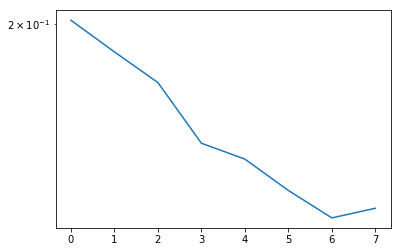

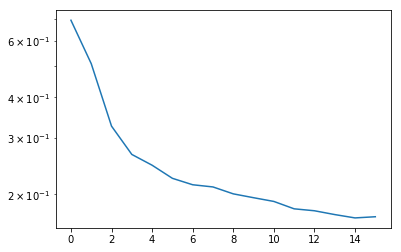

In [61]:
plt.plot(history.history['loss'])
plt.yscale('log')
plt.show()

plt.plot(full_history)
plt.yscale('log')
plt.show()

# Evaluate on Custom Text

In [62]:
import re
words_only = r'[^\s!,.?\-":;0-9]+'
re.findall(words_only, "Some text to, tokenize. something's.Something-else?".lower())

['some', 'text', 'to', 'tokenize', "something's", 'something', 'else']

In [63]:
def encode(reviewText):

    words = re.findall(words_only, reviewText.lower())
    reviewIDs = [start_char]
    for word in words:
        index = word_index.get(word, oov_char -index_from) + index_from # defaults to oov_char for missing
        if index > top_words:
            index = oov_char
        reviewIDs.append(index)  
    return reviewIDs

toText(encode('To code and back again. ikkyikyptangzooboing ni !!'))


'<start> to code and back again <oov> <oov> '

In [106]:
# reviews from: 
# https://www.pluggedin.com/movie-reviews/solo-a-star-wars-story
# http://badmovie-badreview.com/category/bad-reviews/

user_reviews = ["This movie is horrible",
         "This wasn't a horrible movie and I liked it actually",
         "This movie was great.",
         "What a waste of time. It was too long and didn't make any sense.",
         "This was boring and drab.",
         "I liked the movie.",
         "I didn't like the movie.",
         "I like the lead actor but the movie as a whole fell flat",
         "I don't know. It was ok, some good and some bad. Some will like it, some will not like it.",
         "There are definitely heroic seeds at our favorite space scoundrel's core, though, seeds that simply need a little life experience to nurture them to growth. And that's exactly what this swooping heist tale is all about. You get a yarn filled with romance, high-stakes gambits, flashy sidekicks, a spunky robot and a whole lot of who's-going-to-outfox-who intrigue. Ultimately, it's the kind of colorful adventure that one could imagine Harrison Ford's version of Han recalling with a great deal of flourish … and a twinkle in his eye.",
         "There are times to be politically correct and there are times to write things about midget movies, and I’m afraid that sharing Ankle Biters with the wider world is an impossible task without taking the low road, so to speak. There are horrible reasons for this, all of them the direct result of the midgets that this film contains, which makes it sound like I am blaming midgets for my inability to regulate my own moral temperament but I like to think I am a…big…enough person (geddit?) to admit that the problem rests with me, and not the disabled.",
         "While Beowulf didn’t really remind me much of Beowulf, it did reminded me of something else. At first I thought it was Van Helsing, but that just wasn’t it. It only hit me when Beowulf finally told his backstory and suddenly even the dumbest of the dumb will realise that this is a simple ripoff of Blade. The badass hero, who is actually born from evil, now wants to destroy it, while he apparently has to fight his urges to become evil himself (not that it is mentioned beyond a single reference at the end of Beowulf) and even the music fits into the same range. Sadly Beowulf is not even nearly as interesting or entertaining as its role model. The only good aspects I can see in Beowulf would be the stupid beginning and Christopher Lamberts hair. But after those first 10 minutes, the movie becomes just boring and you don’t care much anymore.",
         "You don't frighten us, English pig-dogs!  Go and boil your bottoms, son of a silly person!  I blow my nose at you, so-called Arthur King!  You and all your silly English Knnnnnnnn-ighuts!!!"
        ]

X_user = np.array([encode(review) for review in user_reviews ])
X_user


array([list([1, 14, 20, 9, 527]),
       list([1, 14, 286, 6, 527, 20, 5, 13, 423, 12, 165]),
       list([1, 14, 20, 16, 87]),
       list([1, 51, 6, 437, 7, 58, 12, 16, 99, 196, 5, 161, 97, 101, 281]),
       list([1, 14, 16, 357, 5, 6982]), list([1, 13, 423, 4, 20]),
       list([1, 13, 161, 40, 4, 20]),
       list([1, 13, 40, 4, 485, 284, 21, 4, 20, 17, 6, 226, 1583, 1035]),
       list([1, 13, 92, 124, 12, 16, 608, 49, 52, 5, 49, 78, 49, 80, 40, 12, 49, 80, 24, 40, 12]),
       list([1, 50, 26, 407, 3818, 2, 33, 263, 514, 834, 2, 2026, 151, 2, 15, 331, 359, 6, 117, 113, 585, 8, 2, 98, 8, 6231, 5, 198, 618, 51, 14, 2, 5436, 787, 9, 32, 44, 25, 79, 6, 8441, 1061, 19, 883, 312, 9926, 2, 5775, 2, 6, 2, 2362, 5, 6, 226, 176, 7, 871, 170, 8, 2, 37, 4030, 1116, 45, 4, 243, 7, 3221, 1154, 15, 31, 100, 838, 5938, 6489, 310, 7, 8061, 2, 19, 6, 87, 855, 7, 2, 2, 5, 6, 2, 11, 27, 744]),
       list([1, 50, 26, 211, 8, 30, 4103, 2296, 5, 50, 26, 211, 8, 901, 183, 44, 8235, 102, 5, 2, 1595, 15

In [107]:
X_user_pad = sequence.pad_sequences(X_user, maxlen=max_review_length)
X_user_pad

array([[   0,    0,    0, ...,   20,    9,  527],
       [   0,    0,    0, ...,  423,   12,  165],
       [   0,    0,    0, ...,   20,   16,   87],
       ..., 
       [   0,    0,    0, ...,   24,    4, 6356],
       [   0,    0,    0, ...,  459,   76, 1627],
       [   0,    0,    0, ...,  631,    2,    2]], dtype=int32)

# Features View

In [108]:
for row in X_user_pad:
    print()
    print(toText(row))


<start> this movie is horrible 

<start> this wasn't a horrible movie and i liked it actually 

<start> this movie was great 

<start> what a waste of time it was too long and didn't make any sense 

<start> this was boring and drab 

<start> i liked the movie 

<start> i didn't like the movie 

<start> i like the lead actor but the movie as a whole fell flat 

<start> i don't know it was ok some good and some bad some will like it some will not like it 

<start> there are definitely heroic <oov> at our favorite space <oov> core though <oov> that simply need a little life experience to <oov> them to growth and that's exactly what this <oov> heist tale is all about you get a yarn filled with romance high stakes <oov> flashy <oov> a <oov> robot and a whole lot of who's going to <oov> who intrigue ultimately it's the kind of colorful adventure that one could imagine harrison ford's version of han <oov> with a great deal of <oov> <oov> and a <oov> in his eye 

<start> there are times to b

# Results

In [109]:
user_scores = model.predict(X_user_pad)
is_positive = user_scores >= 0.5  # I'm an optimist

for i in range(len(user_reviews)):
    print(  '\n%.2f %s:' % (user_scores[i][0], 'positive' if is_positive[i] else 'negative' ) + ' ' + user_reviews[i] )


0.01 negative: This movie is horrible

0.26 negative: This wasn't a horrible movie and I liked it actually

0.76 positive: This movie was great.

0.03 negative: What a waste of time. It was too long and didn't make any sense.

0.01 negative: This was boring and drab.

0.57 positive: I liked the movie.

0.15 negative: I didn't like the movie.

0.04 negative: I like the lead actor but the movie as a whole fell flat

0.17 negative: I don't know. It was ok, some good and some bad. Some will like it, some will not like it.

0.99 positive: There are definitely heroic seeds at our favorite space scoundrel's core, though, seeds that simply need a little life experience to nurture them to growth. And that's exactly what this swooping heist tale is all about. You get a yarn filled with romance, high-stakes gambits, flashy sidekicks, a spunky robot and a whole lot of who's-going-to-outfox-who intrigue. Ultimately, it's the kind of colorful adventure that one could imagine Harrison Ford's version